In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
            .appName("Map-Reduce") \
            .master("local[*]") \
            .config("spark.ui.port", "4040") \
            .getOrCreate()

sc = spark.sparkContext

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/02/12 03:29:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [20]:
data = [
('apple', 1),
('banana', 2),
('apple', 3),
('orange', 4),
('banana', 1),
('orange', 2)
]

rdd_data = sc.parallelize(data)
result = rdd_data.reduceByKey(lambda x, y: x + y)
r = result.collect()
r

[('banana', 3), ('orange', 6), ('apple', 4)]

In [21]:
grpupped_rdd = rdd_data.groupByKey()
group = grpupped_rdd.collect()
group


[('banana', <pyspark.resultiterable.ResultIterable at 0xffff371dd150>),
 ('orange', <pyspark.resultiterable.ResultIterable at 0xffff371dd600>),
 ('apple', <pyspark.resultiterable.ResultIterable at 0xffff371dd630>)]

In [22]:
for k,v in group:
    print(f"[{k}] -> {list(v)}")

[banana] -> [2, 1]
[orange] -> [4, 2]
[apple] -> [1, 3]


In [23]:
words = ["apple", "banana", "apple", "orange",
"banana", "apple", "orange", "orange"]
words_rdd = sc.parallelize(words)

counter = words_rdd.countByValue()
counter

defaultdict(int, {'apple': 3, 'banana': 2, 'orange': 3})

In [24]:
numbers = [i for i in range(100)]

In [25]:
numbers_rdd = sc.parallelize(numbers)
filtered = numbers_rdd.filter(lambda x: x % 5 == 0)
res_filter = filtered.collect()
filtered.__class__


pyspark.core.rdd.PipelinedRDD

In [26]:
print(res_filter.__class__)

<class 'list'>


In [27]:
res_filter

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [2]:
from PIL import Image
import pytesseract


In [29]:
!pwd

/opt/spark/work-dir/notebooks/examples


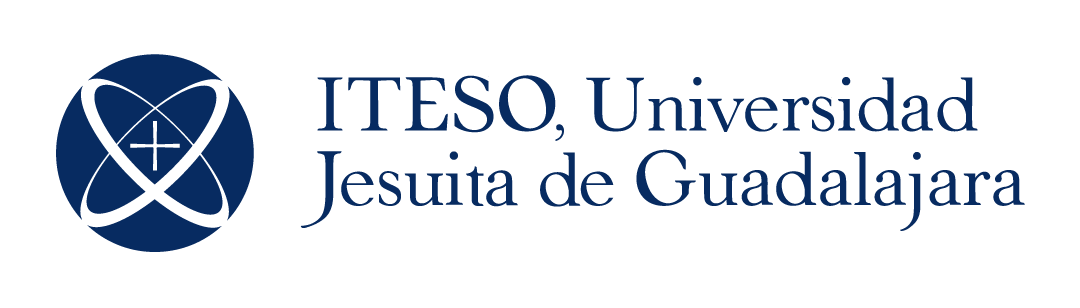

In [30]:
img = Image.open("/opt/spark/work-dir/notebooks/img/ITESOLogo.png")
img

In [31]:
text = pytesseract.image_to_string(img)
text

'Jesuita de Guadalaj ara\n\niS ITESO, Universidad\nnS\n\x0c'

In [3]:
def extract_text(filename):
    img = Image.open(filename)
    return pytesseract.image_to_string(img)

In [4]:
files = ["/opt/spark/work-dir/notebooks/img/ITESOLogo.png",
        "/opt/spark/work-dir/notebooks/img/text1.png",
        "/opt/spark/work-dir/notebooks/img/text2.jpeg"]
rdd = sc.parallelize(files)

In [5]:
rdd_map = rdd.map(extract_text)

In [6]:
result = rdd_map.collect()

In [7]:
result

['Jesuita de Guadalaj ara\n\niS ITESO, Universidad\nnS\n\x0c',
 '(a\n\nPELIGRO\n\n   \n\x0c',
 'ABIERTO\n\x0c']